In [407]:
pip install prophet 

Note: you may need to restart the kernel to use updated packages.


#### Dataset

In [409]:
# monthly-car-sales.csv
# Location: https://mitu.co.in/dataset

In [410]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [411]:
df = pd.read_csv('monthly-car-sales.csv')

In [412]:
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [413]:
df.dtypes

Month    object
Sales     int64
dtype: object

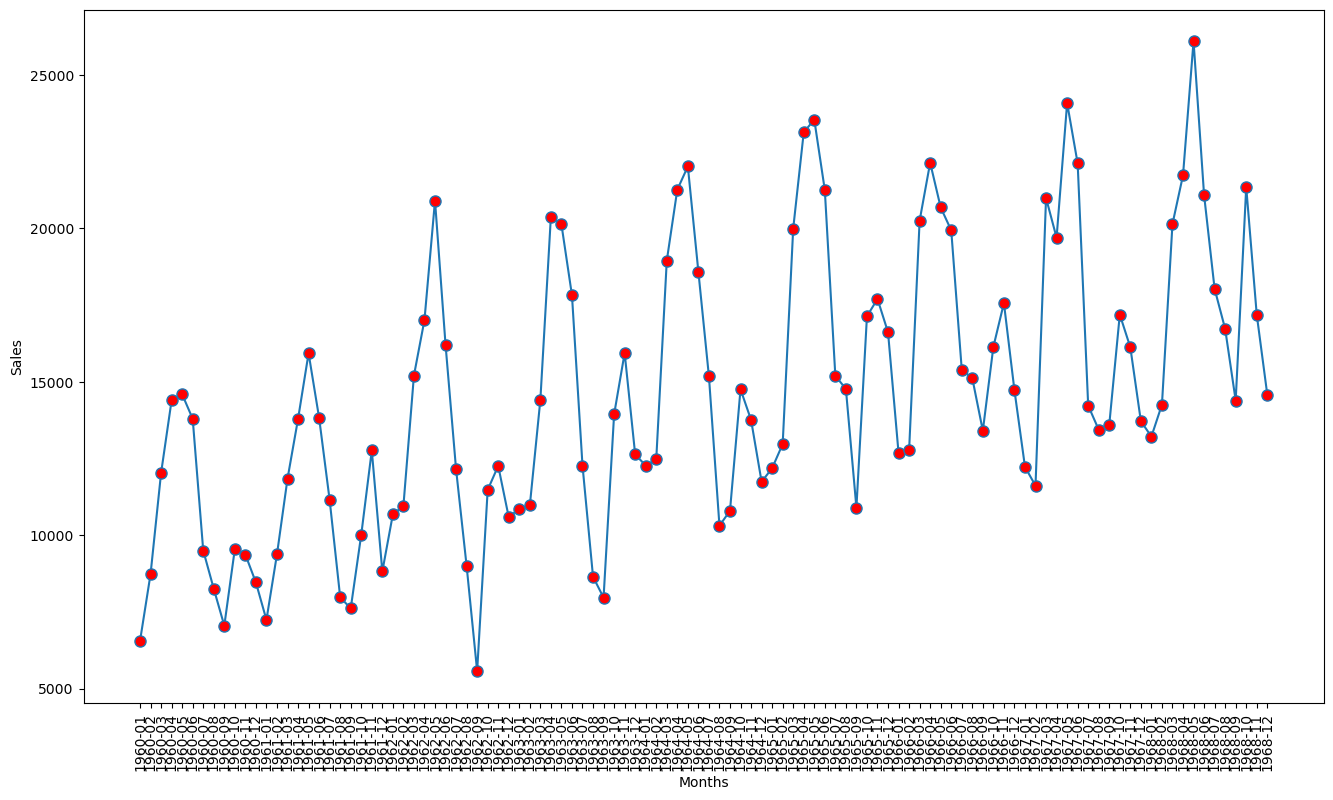

In [414]:
plt.figure(figsize=(16,9))
plt.xlabel('Months')
plt.ylabel('Sales')
plt.xticks(rotation='vertical')
plt.plot(df['Month'], df['Sales'], marker='o', mfc='r', ms=8)

In [415]:
df.columns

Index(['Month', 'Sales'], dtype='object')

In [416]:
df.columns=['ds','y']

In [417]:
df.columns

Index(['ds', 'y'], dtype='object')

In [418]:
df.head()

,ds,y
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [419]:
# prepare expected column names
df['ds']= pd.to_datetime(df['ds'])

In [420]:
df

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587
...,...,...
103,1968-08-01,16722
104,1968-09-01,14385
105,1968-10-01,21342
106,1968-11-01,17180


In [421]:
df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [422]:
df.iloc[4,0]

Timestamp('1960-05-01 00:00:00')

In [423]:
import time

In [424]:
time.time()

1727763721.0066442

In [425]:
time.asctime()

'Tue Oct  1 11:52:01 2024'

In [426]:
time.localtime()

time.struct_time(tm_year=2024, tm_mon=10, tm_mday=1, tm_hour=11, tm_min=52, tm_sec=1, tm_wday=1, tm_yday=275, tm_isdst=0)

##### Build the model

In [428]:
from prophet import Prophet

In [429]:
model = Prophet(weekly_seasonality=True, daily_seasonality=True)

In [430]:
model.fit(df)

11:52:01 - cmdstanpy - INFO - Chain [1] start processing
11:52:01 - cmdstanpy - INFO - Chain [1] done processing


In [431]:
# Define the period for which we want a prediction

In [432]:
future =list()
for i in range(1,13):
    date = '1969-%02d' % i
    future.append([date])

for i in range(1,13):
    date = '1970-%02d' % i
    future.append([date])

for i in range(1,13):
    date = '1971-%02d' % i
    future.append([date])

In [433]:
future

[['1969-01'],
 ['1969-02'],
 ['1969-03'],
 ['1969-04'],
 ['1969-05'],
 ['1969-06'],
 ['1969-07'],
 ['1969-08'],
 ['1969-09'],
 ['1969-10'],
 ['1969-11'],
 ['1969-12'],
 ['1970-01'],
 ['1970-02'],
 ['1970-03'],
 ['1970-04'],
 ['1970-05'],
 ['1970-06'],
 ['1970-07'],
 ['1970-08'],
 ['1970-09'],
 ['1970-10'],
 ['1970-11'],
 ['1970-12'],
 ['1971-01'],
 ['1971-02'],
 ['1971-03'],
 ['1971-04'],
 ['1971-05'],
 ['1971-06'],
 ['1971-07'],
 ['1971-08'],
 ['1971-09'],
 ['1971-10'],
 ['1971-11'],
 ['1971-12']]

In [434]:
future = pd.DataFrame(future, columns=['ds'])

In [435]:
future

,ds
0,1969-01
1,1969-02
2,1969-03
3,1969-04
4,1969-05
5,1969-06
6,1969-07
7,1969-08
8,1969-09
9,1969-10


In [436]:
# predict on the future time
forecast= model.predict(future)

In [437]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1969-01-01,16076.662636,14407.242963,17506.627459,16076.531208,16076.788990,-37.390946,-37.390946,-37.390946,2481.534678,...,291.115404,291.115404,291.115404,-2810.041029,-2810.041029,-2810.041029,0.0,0.0,0.0,16039.271690
1,1969-02-01,16134.855576,13356.852674,16558.646103,16133.651148,16136.105631,-1206.698236,-1206.698236,-1206.698236,2481.534678,...,-894.970832,-894.970832,-894.970832,-2793.262082,-2793.262082,-2793.262082,0.0,0.0,0.0,14928.157340
2,1969-03-01,16187.416940,18887.709808,21925.456083,16184.440438,16190.430141,4199.133186,4199.133186,4199.133186,2481.534678,...,-894.970832,-894.970832,-894.970832,2612.569340,2612.569340,2612.569340,0.0,0.0,0.0,20386.550127
3,1969-04-01,16245.609880,22587.919948,25663.504803,16240.550865,16251.402990,7813.243058,7813.243058,7813.243058,2481.534678,...,440.372868,440.372868,440.372868,4891.335512,4891.335512,4891.335512,0.0,0.0,0.0,24058.852938
4,1969-05-01,16301.925628,23883.516925,26931.651394,16294.903996,16310.099297,9093.273353,9093.273353,9093.273353,2481.534678,...,270.647674,270.647674,270.647674,6341.091001,6341.091001,6341.091001,0.0,0.0,0.0,25395.198981
5,1969-06-01,16360.118567,20230.204265,23402.530308,16349.414630,16371.540426,5449.276953,5449.276953,5449.276953,2481.534678,...,-494.946881,-494.946881,-494.946881,3462.689155,3462.689155,3462.689155,0.0,0.0,0.0,21809.395521
6,1969-07-01,16416.434315,17014.939104,20046.534899,16402.353193,16430.816369,2074.226403,2074.226403,2074.226403,2481.534678,...,440.372868,440.372868,440.372868,-847.681144,-847.681144,-847.681144,0.0,0.0,0.0,18490.660718
7,1969-08-01,16474.627255,14150.234807,17075.502070,16457.396864,16493.333711,-790.823815,-790.823815,-790.823815,2481.534678,...,-52.091765,-52.091765,-52.091765,-3220.266728,-3220.266728,-3220.266728,0.0,0.0,0.0,15683.803440
8,1969-09-01,16532.820194,13248.973605,16293.379450,16511.247650,16555.680359,-1727.774897,-1727.774897,-1727.774897,2481.534678,...,439.873531,439.873531,439.873531,-4649.183107,-4649.183107,-4649.183107,0.0,0.0,0.0,14805.045298
9,1969-10-01,16589.135942,17742.409472,20667.405646,16562.142448,16616.249174,2606.836487,2606.836487,2606.836487,2481.534678,...,291.115404,291.115404,291.115404,-165.813596,-165.813596,-165.813596,0.0,0.0,0.0,19195.972429


In [438]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [439]:
# summarize the forecast
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1969-01-01,16039.271690,14407.242963,17506.627459
1,1969-02-01,14928.157340,13356.852674,16558.646103
2,1969-03-01,20386.550127,18887.709808,21925.456083
3,1969-04-01,24058.852938,22587.919948,25663.504803
4,1969-05-01,25395.198981,23883.516925,26931.651394
5,1969-06-01,21809.395521,20230.204265,23402.530308
6,1969-07-01,18490.660718,17014.939104,20046.534899
7,1969-08-01,15683.803440,14150.234807,17075.502070
8,1969-09-01,14805.045298,13248.973605,16293.379450
9,1969-10-01,19195.972429,17742.409472,20667.405646


C:\Users\duasp\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\duasp\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


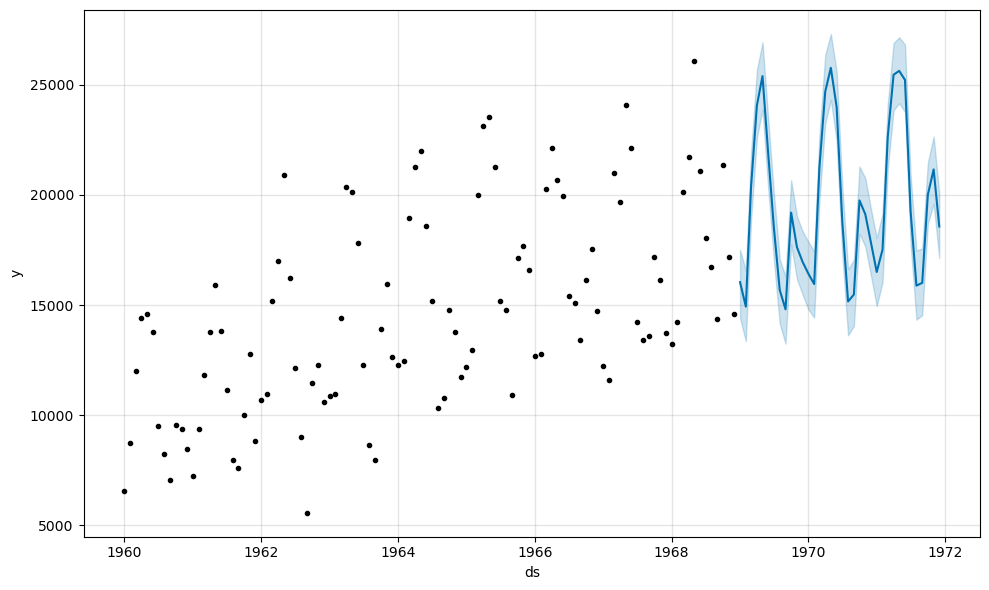

In [440]:
model.plot(forecast);

In [441]:
df

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587
...,...,...
103,1968-08-01,16722
104,1968-09-01,14385
105,1968-10-01,21342
106,1968-11-01,17180


In [442]:
new= forecast[['ds','yhat']]

In [443]:
new

,ds,yhat
0,1969-01-01,16039.271690
1,1969-02-01,14928.157340
2,1969-03-01,20386.550127
3,1969-04-01,24058.852938
4,1969-05-01,25395.198981
5,1969-06-01,21809.395521
6,1969-07-01,18490.660718
7,1969-08-01,15683.803440
8,1969-09-01,14805.045298
9,1969-10-01,19195.972429


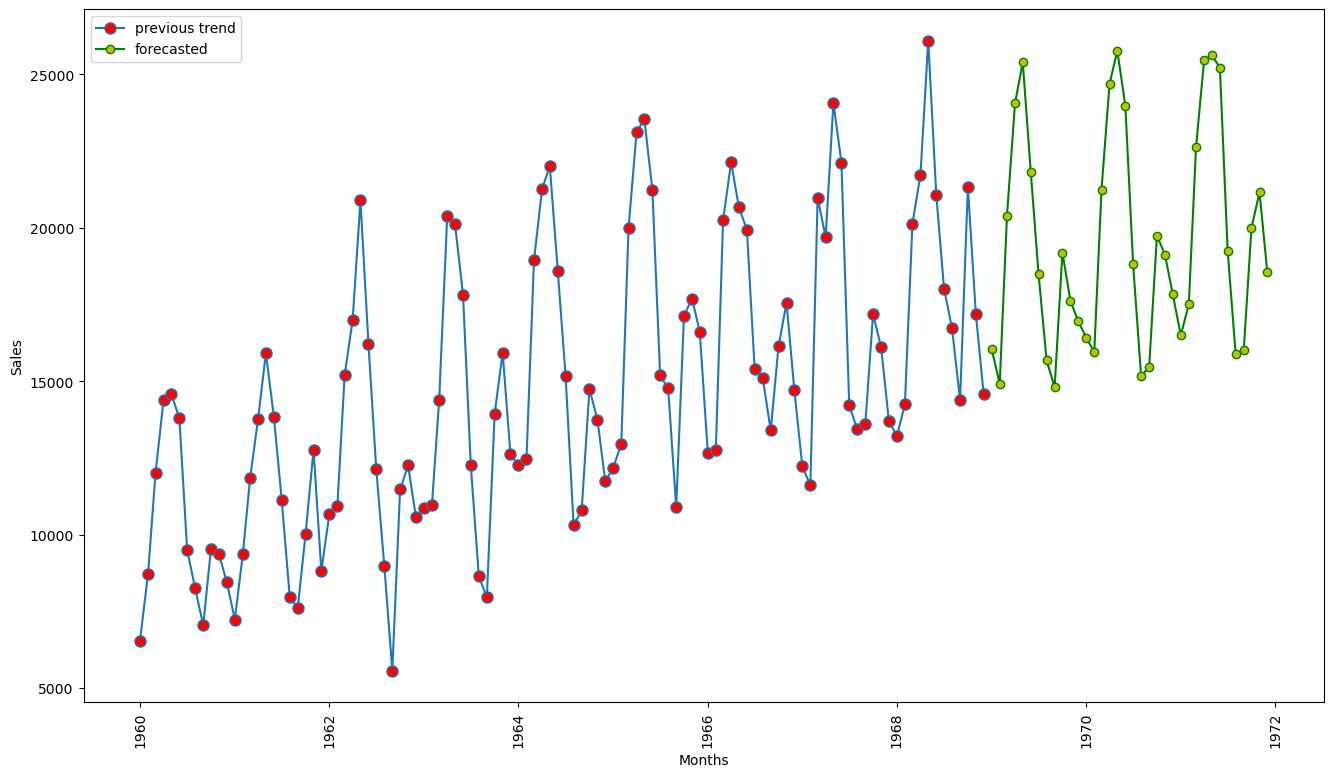

In [444]:
plt.figure(figsize=(16,9))
plt.xlabel('Months')
plt.ylabel('Sales')
plt.xticks(rotation='vertical')
plt.plot(df['ds'], df['y'], marker='o', mfc='r', ms=8, label='previous trend')
plt.plot(new['ds'], new['yhat'], label = 'forecasted', marker='o', color='g', mfc='y')
plt.legend()

In [445]:
# sealevel.csv

#### Predicting the sealevel

In [447]:
df = pd.read_csv('sealevel.csv')

In [448]:
df.head()

,Year,TotalWeightedObservations,GMSL_noGIA,StdDevGMSL_noGIA,SmoothedGSML_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGSML_GIA,SmoothedGSML_GIA_sigremoved
0,1993,327401.31,-38.59,89.86,-38.76,-38.59,89.86,-38.75,-38.57
1,1993,324498.41,-41.97,90.86,-39.78,-41.97,90.86,-39.77,-39.11
2,1993,333018.19,-41.93,87.27,-39.62,-41.91,87.27,-39.61,-38.58
3,1993,297483.19,-42.67,90.75,-39.67,-42.65,90.74,-39.64,-38.34
4,1993,321635.81,-37.86,90.26,-38.75,-37.83,90.25,-38.72,-37.21


In [449]:
df.dtypes

Year                             int64
TotalWeightedObservations      float64
GMSL_noGIA                     float64
StdDevGMSL_noGIA               float64
SmoothedGSML_noGIA             float64
GMSL_GIA                       float64
StdDevGMSL_GIA                 float64
SmoothedGSML_GIA               float64
SmoothedGSML_GIA_sigremoved    float64
dtype: object

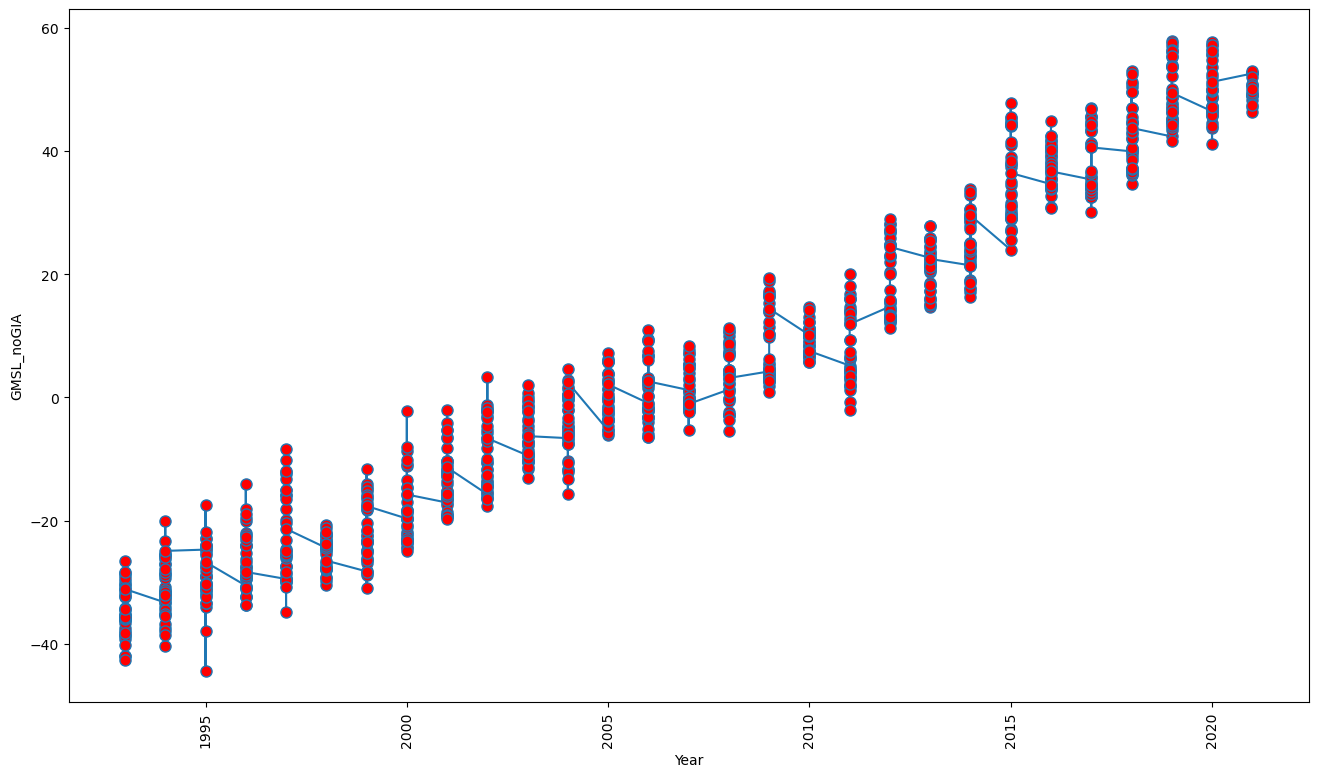

In [450]:
plt.figure(figsize=(16,9))
plt.xlabel('Year')
plt.ylabel('GMSL_noGIA')
plt.xticks(rotation='vertical')
plt.plot(df['Year'], df['GMSL_noGIA'], marker='o', mfc='r', ms=8)

In [451]:
df = pd.DataFrame({
    'ds':df.Year,
    'y':df.GMSL_noGIA
})

In [452]:
df

,ds,y
0,1993,-38.59
1,1993,-41.97
2,1993,-41.93
3,1993,-42.67
4,1993,-37.86
...,...,...
1043,2021,49.26
1044,2021,50.49
1045,2021,49.65
1046,2021,47.46


In [531]:
df['ds'] = pd.to_datetime(df['ds'], format='%Y')

In [535]:
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [537]:
df

,ds,y
0,1993-01-01,-34.605405
1,1994-01-01,-30.951081
2,1995-01-01,-28.645946
3,1996-01-01,-26.596389
4,1997-01-01,-22.682432
5,1998-01-01,-25.060541
6,1999-01-01,-21.812432
7,2000-01-01,-18.425405
8,2001-01-01,-13.219189
9,2002-01-01,-9.372778


In [539]:
df['ds'].value_counts()

ds
1993-01-01    1
2008-01-01    1
2020-01-01    1
2019-01-01    1
2018-01-01    1
2017-01-01    1
2016-01-01    1
2015-01-01    1
2014-01-01    1
2013-01-01    1
2012-01-01    1
2011-01-01    1
2010-01-01    1
2009-01-01    1
2007-01-01    1
1994-01-01    1
2006-01-01    1
2005-01-01    1
2004-01-01    1
2003-01-01    1
2002-01-01    1
2001-01-01    1
2000-01-01    1
1999-01-01    1
1998-01-01    1
1997-01-01    1
1996-01-01    1
1995-01-01    1
2021-01-01    1
Name: count, dtype: int64

In [541]:
df = df.groupby(['ds']).mean()

In [543]:
df

,y
ds,
1993-01-01,-34.605405
1994-01-01,-30.951081
1995-01-01,-28.645946
1996-01-01,-26.596389
1997-01-01,-22.682432
1998-01-01,-25.060541
1999-01-01,-21.812432
2000-01-01,-18.425405
2001-01-01,-13.219189


In [545]:
df = df.reset_index()

In [547]:
df

,ds,y
0,1993-01-01,-34.605405
1,1994-01-01,-30.951081
2,1995-01-01,-28.645946
3,1996-01-01,-26.596389
4,1997-01-01,-22.682432
5,1998-01-01,-25.060541
6,1999-01-01,-21.812432
7,2000-01-01,-18.425405
8,2001-01-01,-13.219189
9,2002-01-01,-9.372778


In [549]:
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [551]:
model = Prophet(weekly_seasonality=True, daily_seasonality=True, yearly_seasonality=True)

In [553]:
model.fit(df)

11:54:21 - cmdstanpy - INFO - Chain [1] start processing
11:54:21 - cmdstanpy - INFO - Chain [1] done processing


In [555]:
future =list()
for i in range(22,31):
    date = '20%02d' % i
    future.append([date])

In [557]:
future

[['2022'],
 ['2023'],
 ['2024'],
 ['2025'],
 ['2026'],
 ['2027'],
 ['2028'],
 ['2029'],
 ['2030']]

In [559]:
future = pd.DataFrame(future, columns=['ds'])

In [561]:
future

,ds
0,2022
1,2023
2,2024
3,2025
4,2026
5,2027
6,2028
7,2029
8,2030


In [573]:
future['ds'] = pd.to_datetime(future['ds'], format='%Y')

In [575]:
forecast= model.predict(future)

In [577]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-01,95.777996,46.213255,54.614117,95.777655,95.778299,-45.613280,-45.613280,-45.613280,91.467478,...,-1.737257,-1.737257,-1.737257,-135.343501,-135.343501,-135.343501,0.0,0.0,0.0,50.164716
1,2023-01-01,98.882534,51.111375,60.011634,98.881469,98.883529,-43.419752,-43.419752,-43.419752,91.467478,...,0.520306,0.520306,0.520306,-135.407536,-135.407536,-135.407536,0.0,0.0,0.0,55.462782
2,2024-01-01,101.987071,54.204594,63.273490,101.985026,101.989096,-43.505970,-43.505970,-43.505970,91.467478,...,0.217960,0.217960,0.217960,-135.191407,-135.191407,-135.191407,0.0,0.0,0.0,58.481102
3,2025-01-01,105.100114,58.549042,67.356709,105.096871,105.103377,-42.248919,-42.248919,-42.248919,91.467478,...,1.282956,1.282956,1.282956,-134.999353,-134.999353,-134.999353,0.0,0.0,0.0,62.851195
4,2026-01-01,108.204652,59.471268,68.529610,108.200169,108.209231,-44.180646,-44.180646,-44.180646,91.467478,...,-0.304622,-0.304622,-0.304622,-135.343501,-135.343501,-135.343501,0.0,0.0,0.0,64.024006
5,2027-01-01,111.309189,62.894337,71.872179,111.303103,111.315403,-43.817544,-43.817544,-43.817544,91.467478,...,0.122514,0.122514,0.122514,-135.407536,-135.407536,-135.407536,0.0,0.0,0.0,67.491645
6,2028-01-01,114.413727,64.504054,73.121999,114.405957,114.421553,-45.461186,-45.461186,-45.461186,91.467478,...,-1.737257,-1.737257,-1.737257,-135.191407,-135.191407,-135.191407,0.0,0.0,0.0,68.952540
7,2029-01-01,117.526770,70.005464,78.574886,117.517247,117.536499,-43.313915,-43.313915,-43.313915,91.467478,...,0.217960,0.217960,0.217960,-134.999353,-134.999353,-134.999353,0.0,0.0,0.0,74.212855
8,2030-01-01,120.631307,72.419749,81.083048,120.619613,120.642860,-43.977880,-43.977880,-43.977880,91.467478,...,-0.101856,-0.101856,-0.101856,-135.343501,-135.343501,-135.343501,0.0,0.0,0.0,76.653427


C:\Users\duasp\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\duasp\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


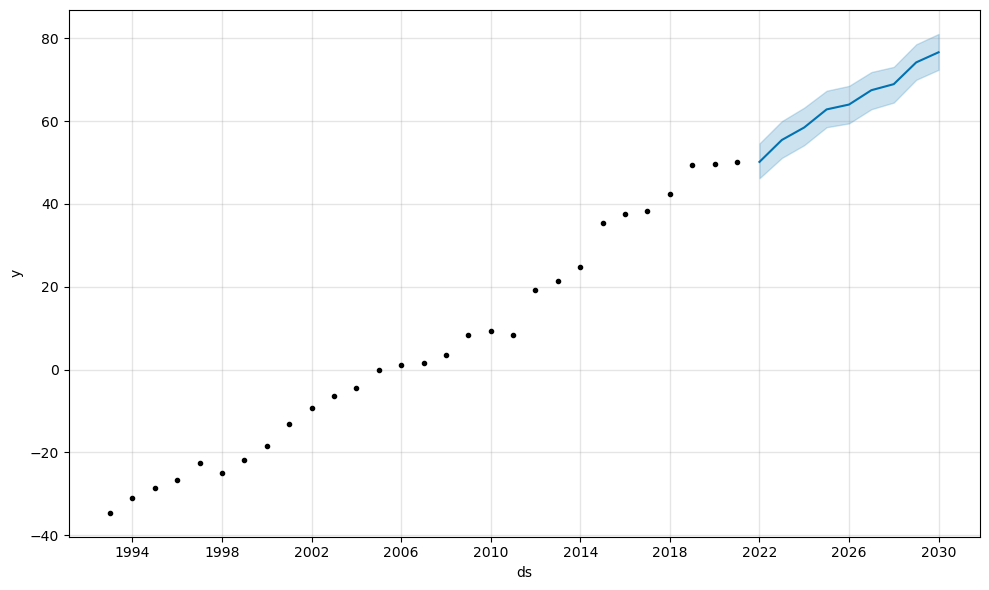

In [579]:
model.plot(forecast);

In [587]:
new= forecast[['ds','yhat']]

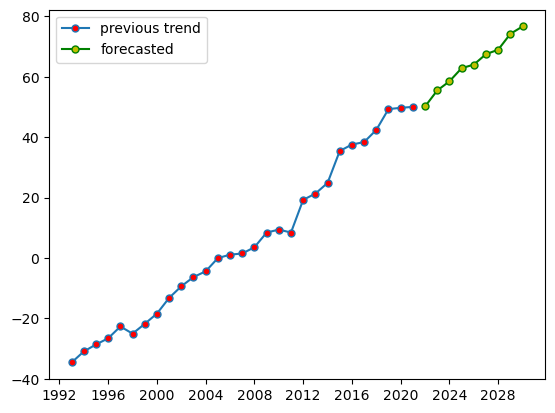

In [599]:
# plt.figure(figsize=(16,9))
plt.plot(df['ds'], df['y'], marker='o', mfc='r', ms=5, label='previous trend')
plt.plot(new['ds'], new['yhat'], label = 'forecasted', marker='o', color='g', ms=5, mfc='y')
plt.legend()